Found 400 images belonging to 10 classes.
Found 100 images belonging to 10 classes.
Found 1000 images belonging to 10 classes.
Epoch 1/5
400/400 [==============================] - 1s 2ms/step - loss: 1.9297 - accuracy: 0.3775 - val_loss: 1.4822 - val_accuracy: 0.5400
Epoch 2/5
400/400 [==============================] - 1s 2ms/step - loss: 1.0604 - accuracy: 0.7000 - val_loss: 1.0101 - val_accuracy: 0.7100
Epoch 3/5
400/400 [==============================] - 1s 2ms/step - loss: 0.6776 - accuracy: 0.7975 - val_loss: 0.9676 - val_accuracy: 0.7300
Epoch 4/5
400/400 [==============================] - 1s 2ms/step - loss: 0.5032 - accuracy: 0.8675 - val_loss: 0.9984 - val_accuracy: 0.7300
Epoch 5/5
400/400 [==============================] - 1s 2ms/step - loss: 0.4004 - accuracy: 0.8800 - val_loss: 0.9829 - val_accuracy: 0.7300
Train accuracy :  0.8799999952316284
Val accuracy :  0.7300000190734863
Train loss :  0.4004272520542145
Val loss :  0.9829382300376892
1000/1000 [=====================

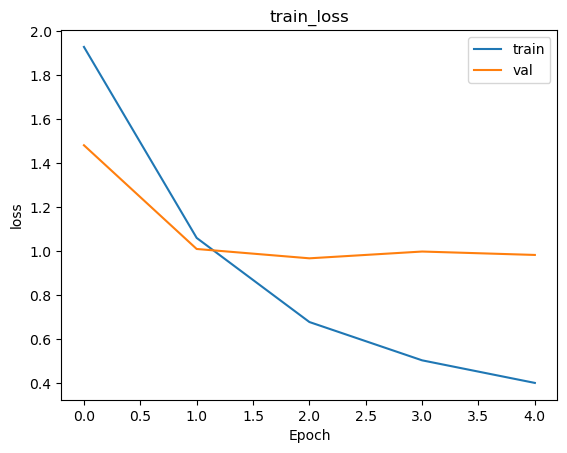

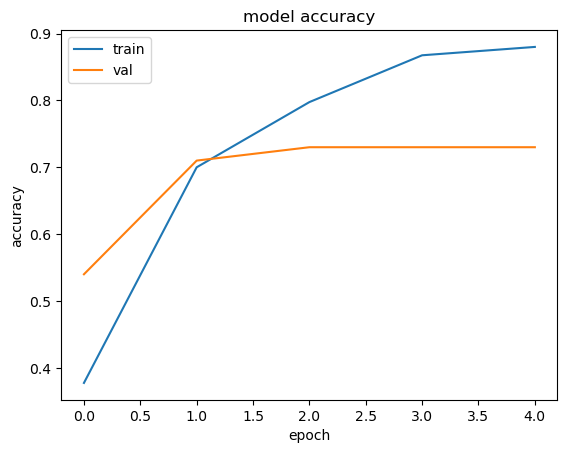

In [3]:

# -------------------------------------------------------------------------------------------------------
# KC: To prepare dataset including train_set, validation_set, and test_set
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# KC: ImageDataGenerator can create an object used to generate batches of image data
image_datagen = ImageDataGenerator(rescale = 1./255, dtype='float32', validation_split=0.2)

# KC: The ImageDataGenerator class has the method flow_from_directory() 
#       wihch can read the images from folders containing images.
train_set = image_datagen.flow_from_directory(  'dataset/final_project_dataset/Train/',
                                                 target_size = (28, 28),
                                                 batch_size  = 1,
                                                 class_mode  = 'categorical',
                                                 subset='training'
                                                 )

validation_set = image_datagen.flow_from_directory(  'dataset/final_project_dataset/Train/',
                                                 target_size = (28, 28),
                                                 batch_size  = 1,
                                                 class_mode  = 'categorical',
                                                 subset='validation'
                                                 )

test_set = image_datagen.flow_from_directory('dataset/final_project_dataset/Test/',
                                                target_size = (28, 28),
                                                batch_size  = 1,
                                                class_mode  = 'categorical',
                                                )

from keras import models
from keras import layers
from keras import losses

# KC: to build up a model
# ------------------------------------------------[ Densely Connected Model ] -----------------------------
network = models.Sequential()
network.add(layers.Flatten(input_shape=(28,28,3)))
network.add(layers.Dense(16, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop', 
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# KC: start to train the model
history = network.fit(  train_set,
                        validation_data  = validation_set,
                        epochs           = 5 )

print("Train accuracy : ", str(history.history['accuracy'][-1]))
print("Val accuracy : ", str(history.history['val_accuracy'][-1]))

print("Train loss : ", str(history.history['loss'][-1]))
print("Val loss : ", str(history.history['val_loss'][-1]))


# KC: To show the evaluation resuls of the Test set
test_loss, test_acc = network.evaluate(test_set)
print(' ')
print('Accuracy for Testset:', test_acc)
print(' ')

# ---------------------------------------------------------------------------------------------------------------------
# KC: To plot result figures
import matplotlib.pyplot    as plt

#---------- loss figure -----------------
plt.plot(history.history['loss'])
plt.plot(history.history["val_loss"])
plt.title('train_loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()
#------------------------------------
plt.clf()
#-------------- accuracy figure -------
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
#-----------------------------------
